In [2]:
import h5py as h5
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import cv2

# Download braindataset from

In [ ]:
%%bash
mkdir ./data/datasets/brain_tumor
wget -O ./data/datasets/brain_tumor/brain_tumor.zip https://ndownloader.figshare.com/articles/1512427/versions/5
unzip -o -d ./data/datasets/brain_tumor ./data/datasets/brain_tumor/brain_tumor.zip
unzip -o -d ./data/datasets/brain_tumor ./data/datasets/brain_tumor/brainTumorDataPublic_1-766.zip
unzip -o -d ./data/datasets/brain_tumor ./data/datasets/brain_tumor/brainTumorDataPublic_767-1532.zip
unzip -o -d ./data/datasets/brain_tumor ./data/datasets/brain_tumor/brainTumorDataPublic_1533-2298.zip
unzip -o -d ./data/datasets/brain_tumor ./data/datasets/brain_tumor/brainTumorDataPublic_2299-3064.zip
rm ./data/datasets/brain_tumor/*.zip

In [27]:
data_directory = './data/datasets/brain_tumor'

In [20]:
def load_data(path):
    file = h5.File(path,"r")
    data = {}
    data['image']=np.mat(file['/cjdata/image'])
    data['PID'] = np.array2string(np.array(file['/cjdata/PID']).flatten())
    data['label'] = np.array(file['/cjdata/label']).flatten()[0]
    data['tumorBorder']=np.mat(file['/cjdata/tumorBorder'])
    data['tumorMask']=np.mat(file['/cjdata/tumorMask'])
    return data

In [21]:
def draw_border(image, border):
    img = image.copy()
    vertices = border.reshape((-1,2))
    nv = vertices.shape[0]
    white = int(img.max())
    for v in range(1,nv):
        x1 = int(vertices.item(v-1,0))
        y1 = int(vertices.item(v-1,1))
        x2 = int(vertices.item(v,0))
        y2 = int(vertices.item(v,1))
        img = cv2.line(img,(y1,x1),(y2,x2), white, 2)
    return img

In [22]:
def data_generator(directory, start):
    for index in range(start,3040):
        path = f"{directory}/{index}.mat"
        data = load_data(path)
        yield data

In [23]:
def show_data(directory, rows, start=0, picture_size=6):
    data_gen = data_generator(directory, start)
    row = 0
    shape = (rows, 3)
    plt.figure(figsize=(picture_size*shape[1], picture_size*shape[0]))
    for data in data_gen:
        image = data['image']
        mask = data['tumorMask']
        plt.subplot2grid(shape, (row, 0))
        plt.xticks([])
        plt.yticks([])
        plt.title(data['PID'])
        plt.imshow(image,cmap='gray')
        plt.subplot2grid(shape, (row, 1))
        plt.xticks([])
        plt.yticks([])
        plt.title(str(data['label']))
        plt.imshow(mask, cmap='gray')
        plt.subplot2grid(shape, (row,2))
        plt.xticks([])
        plt.yticks([])
        image2 = draw_border(image, data['tumorBorder'])
        plt.imshow(image2, cmap='gray')
        row += 1
        if row>=rows:
            break

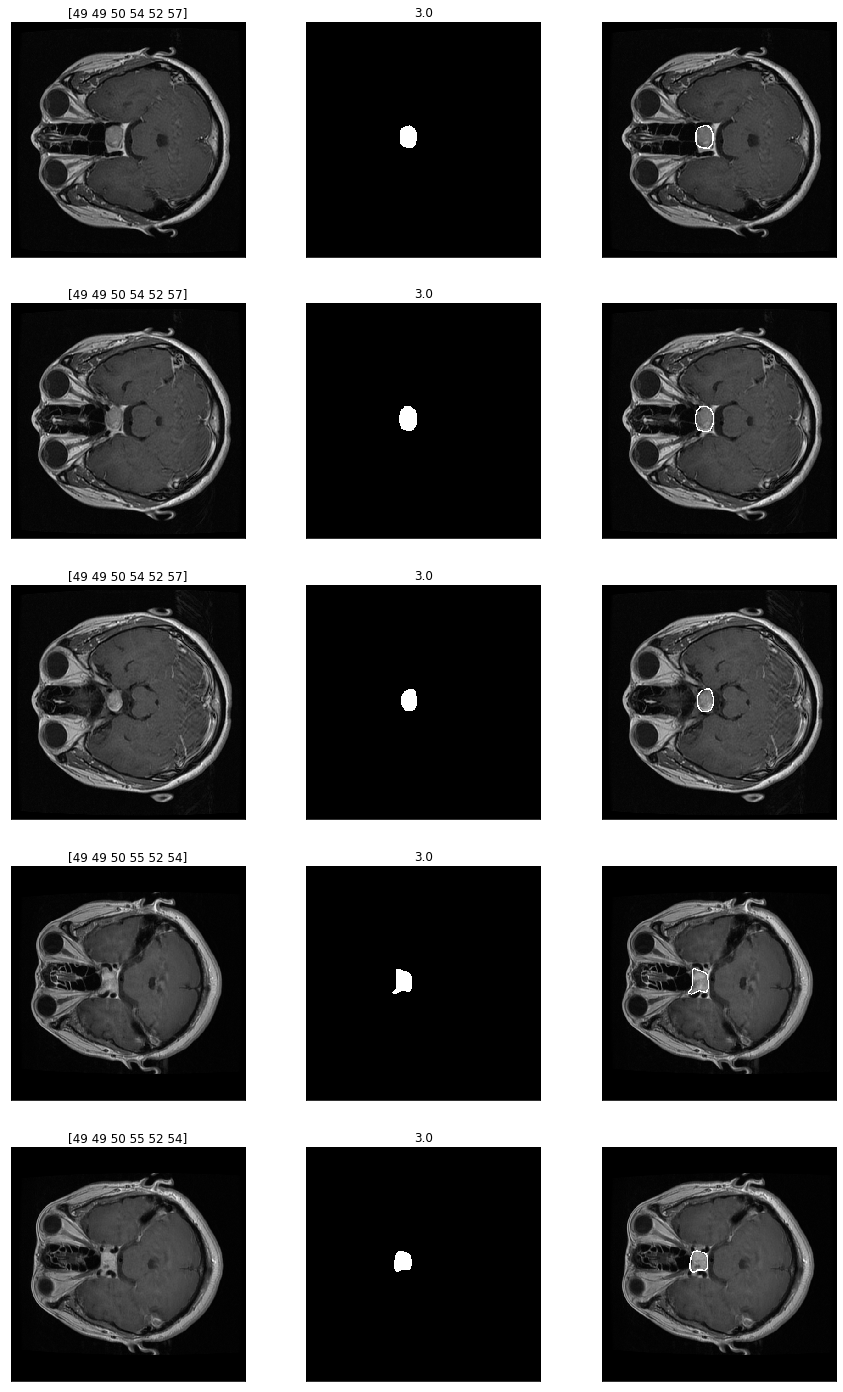

In [28]:
show_data(data_directory,5,1000,5)

In [31]:
data_gen = data_generator(data_directory, 1)
patients = {}
for data in data_gen:
    patient = data['PID']
    if patient in patients:
        patients[patient] += 1
    else:
        patients[patient] = 1

In [32]:
patients

{'[49 48 48 51 54 48]': 18,
 '[49 48 48 53 55 50]': 8,
 '[49 48 49 48 49 54]': 17,
 '[49 48 49 49 50 55]': 12,
 '[49 48 49 55 57 55]': 15,
 '[49 48 50 52 50 48]': 7,
 '[49 48 50 52 52 54]': 4,
 '[49 48 50 54 55 53]': 5,
 '[49 48 50 55 49 52]': 13,
 '[49 48 50 57 50 57]': 8,
 '[49 48 50 57 51 53]': 3,
 '[49 48 50 57 56 53]': 3,
 '[49 48 51 54 55 51]': 18,
 '[49 48 51 57 50 53]': 15,
 '[49 48 52 49 54 55]': 15,
 '[49 48 52 50 56 49]': 17,
 '[49 48 53 51 55 52]': 5,
 '[49 48 53 53 53 53]': 6,
 '[53 56 51 57 50]': 1,
 '[49 48 53 57 51 55]': 9,
 '[49 48 54 50 56 52]': 13,
 '[49 48 54 52 52 50]': 10,
 '[49 48 54 53 51 52]': 6,
 '[49 48 54 54 54 53]': 19,
 '[49 48 54 55 50 48]': 17,
 '[49 48 54 57 49 52]': 15,
 '[49 48 55 49 57 48]': 4,
 '[49 48 55 50 52 56]': 15,
 '[49 48 55 52 57 52]': 15,
 '[49 48 56 53 49 52]': 18,
 '[49 48 56 53 53 48]': 6,
 '[49 48 56 53 57 48]': 6,
 '[49 48 56 57 52 53]': 12,
 '[49 48 57 52 49 49]': 3,
 '[49 48 57 57 54 56]': 12,
 '[49 49 48 49 49 54]': 5,
 '[49 49 49 

In [34]:
counts = [item[1] for item in patients.items()]

(array([ 5., 10., 11., 12.,  9., 10.,  6.,  6.,  8., 11.,  7., 14., 10.,
         0.,  6., 20.,  9., 11., 12., 11.,  6.,  5.,  8.,  5.,  5.,  4.,
         0.,  4.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
         1.]),
 array([ 1.   ,  1.925,  2.85 ,  3.775,  4.7  ,  5.625,  6.55 ,  7.475,
         8.4  ,  9.325, 10.25 , 11.175, 12.1  , 13.025, 13.95 , 14.875,
        15.8  , 16.725, 17.65 , 18.575, 19.5  , 20.425, 21.35 , 22.275,
        23.2  , 24.125, 25.05 , 25.975, 26.9  , 27.825, 28.75 , 29.675,
        30.6  , 31.525, 32.45 , 33.375, 34.3  , 35.225, 36.15 , 37.075,
        38.   ]),
 <a list of 40 Patch objects>)

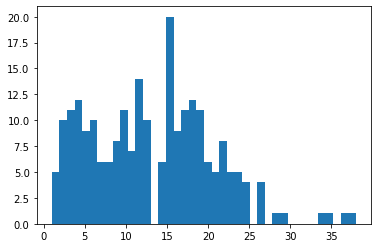

In [38]:
plt.hist(counts, 40)